In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import sys 
sys.path.append('../lavse/')
import json 
import numpy as np

In [2]:
def load_json(path):
    with open(path, 'rb') as ftp:
        return json.load(ftp)

In [3]:
def get_xy(data):
    x, y = [], []
    for line in data:
        x.append(line[1])
        y.append(line[2])
    x = np.array(x)
    y = np.array(y)
    return x, y

In [4]:
settings = {
    'scan': {        
        'color': '#4184f3',
        'label': 'SCAN-i2t',
        'marker': '+',
        't2i': 'run-baseline_scan_f30k_precomp-tag-f30k_precomp.dev.en_t2i_r1.json',
        'i2t': 'run-baseline_scan_f30k_precomp-tag-f30k_precomp.dev.en_i2t_r1.json',        
    },
    'adapt-i2t': {        
        'color': 'k',
        'label': 'ADAPT-i2t',
        'marker': 'x',
        't2i': 'run-adaptive_i2t_bn_linear_f30k_precomp.en-tag-f30k_precomp.dev.en_t2i_r1.json',
        'i2t': 'run-adaptive_i2t_bn_linear_f30k_precomp.en-tag-f30k_precomp.dev.en_i2t_r1.json',
    },
}

In [5]:
plot_list = [
    'scan', 
    'adapt-i2t'
]

FileNotFoundError: [Errno 2] No such file or directory: 'run-baseline_scan_f30k_precomp-tag-f30k_precomp.dev.en_t2i_r1.json'

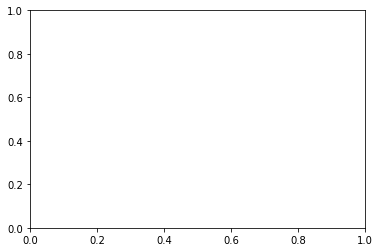

In [6]:
metric = 't2i'
title = 'a) Image Retrieval'

fig, ax = plt.subplots()
for method in plot_list:    
    config = settings[method]
    file = load_json(config[metric])
    x, y = get_xy(file)
    
    _ = ax.plot(
        x/1000, y, 
        color=config['color'], 
        marker=config['marker'],
        label=config['label'],
    )
ax.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.xlabel('Iterations ($1\\times10^3$)', fontsize=16)
plt.ylabel('R@1', fontsize=16)
plt.title(title, fontsize=18)
plt.tight_layout()
plt.savefig(f'{metric}.pdf', bbox_to_inches='tight')

In [ ]:
metric = 'i2t'
title = 'b) Image Annotation'

fig, ax = plt.subplots()
for method in plot_list:    
    config = settings[method]
    file = load_json(config[metric])
    x, y = get_xy(file)
    _ = ax.plot(
        x/1000, y, 
        color=config['color'], 
        marker=config['marker'],
        label=config['label'],
    )
ax.tick_params(labelsize=14)
plt.legend(fontsize=16)
plt.xlabel('Iterations ($1\\times10^3$)', fontsize=16)
plt.ylabel('R@1', fontsize=16)
plt.title(title, fontsize=18)
plt.tight_layout()
plt.savefig(f'{metric}.pdf', bbox_to_inches='tight')